In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Load your dataset
data = pd.read_csv('data.csv')

In [57]:
# Select relevant features for the analysis
features = ['Perseverance', 'DesireToTakeInitiative', 'Competitiveness', 
            'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence', 
            'GoodPhysicalHealth']

In [59]:
# Prepare the feature matrix (X) and the target variable (y)
X = data[features]
y = data['y']

In [61]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [65]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

In [67]:
# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 400],                # Increased number of trees
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [69]:
# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [71]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\s

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 400]},
             verbose=2)

In [73]:
# Get the best model from grid search
best_rf = grid_search.best_estimator_

In [75]:
# Predict on the test set
y_pred = best_rf.predict(X_test)

In [77]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Random Forest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Tuned Random Forest Accuracy: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        41
           1       0.39      0.28      0.33        25

    accuracy                           0.56        66
   macro avg       0.51      0.51      0.50        66
weighted avg       0.54      0.56      0.54        66



In [79]:
# Perform cross-validation
cv_scores = cross_val_score(best_rf, X_scaled, y, cv=10)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.56


In [81]:
# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

C:\Users\Dell\AppData\Local\Temp\ipykernel_28348\1652538710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette="viridis")


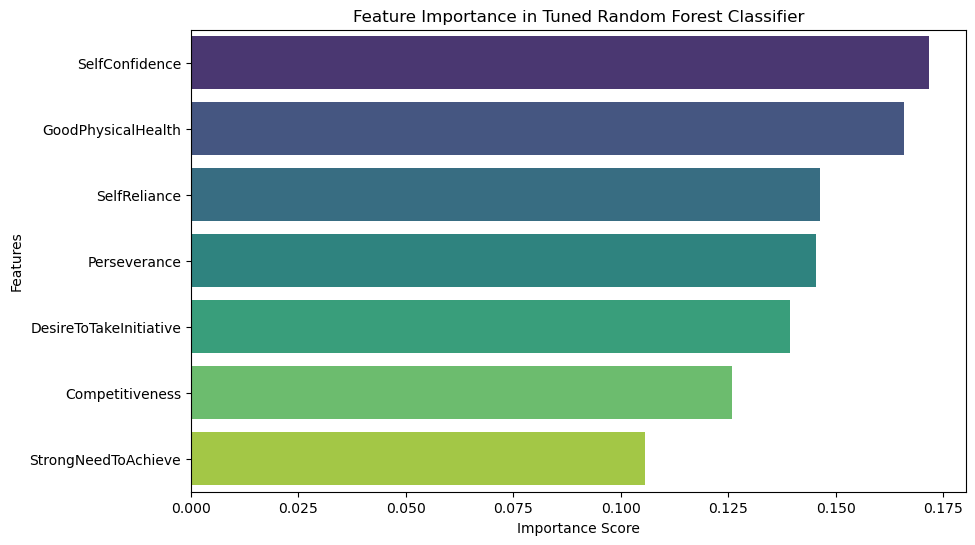

In [83]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette="viridis")
plt.title("Feature Importance in Tuned Random Forest Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()